In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Empty Data frame to store the different parameter values
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Mean Squared Error (MSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[],
                           '10-Fold Cross Validation':[]})


In [3]:
# Importing the data
df = pd.read_csv('D:\Off the Work\Projects\House Price Estimation\Problem 2\kc_house_data.csv',parse_dates = ['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
# Converting ceratin fields into categorical variables
df['waterfront'] = df['waterfront'].astype('category',ordered=True)
df['view'] = df['view'].astype('category',ordered=True)
df['condition'] = df['condition'].astype('category',ordered=True)
df['grade'] = df['grade'].astype('category',ordered=False)
df['zipcode'] = df['zipcode'].astype(str)


In [10]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [12]:
df.shape

(21613, 21)

In [5]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.0,21613.0,...,21613.0,21613.000000,21613.000000,21613.000000,21613.000000,21613,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,...,12.0,NaN,NaN,NaN,NaN,70,NaN,NaN,NaN,NaN
top,NaN,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,7.0,NaN,NaN,NaN,NaN,98103,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,21450.0,19489.0,...,8981.0,NaN,NaN,NaN,NaN,602,NaN,NaN,NaN,NaN
first,NaN,2014-05-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,NaN,NaN,...,NaN,1788.390691,291.509045,1971.005136,84.402258,NaN,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,NaN,NaN,...,NaN,828.090978,442.575043,29.373411,401.679240,NaN,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,NaN,NaN,...,NaN,290.000000,0.000000,1900.000000,0.000000,NaN,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,NaN,NaN,...,NaN,1190.000000,0.000000,1951.000000,0.000000,NaN,47.471000,-122.328000,1490.000000,5100.000000


In [6]:
# Function for calculating adjusted R-Squared
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [7]:
# Simple Linear Regression
train_data, test_data = train_test_split(df,train_size = 0.8, random_state = 3)
lr = linear_model.LinearRegression()

# Fitting the train dataset with the LR model
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
# Fitting the test dataset with the LR model and predicting the results
X_test = np.array(test_data['sqft_living'],dtype=pd.Series).reshape(-1,1)
y_test = np.array(test_data['price'],dtype = pd.Series).reshape(-1,1)

pred = lr.predict(X_test)

In [9]:
lr.score(X_train, y_train)

0.4920351475389229

In [10]:
# Calculating the important metrics
msesm = float(format(np.sqrt(metrics.mean_squared_error(y_test,pred)),'.3f'))
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv_5 = float(format(cross_val_score(lr,df[['sqft_living']],df['price'],cv=5).mean(),'.3f'))
cv_10 = float(format(cross_val_score(lr,df[['sqft_living']],df['price'],cv=10).mean(),'.3f'))

In [11]:
print("Average Price for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

Average Price for Test Data: 539744.130
Intercept: -47235.811302901246
Coefficient: [282.2468152]


In [12]:
r = evaluation.shape[0]

In [13]:
evaluation.loc[r] = ['Simple Linear Regression','-',msesm,rtrsm,'-',rtesm,'-',cv_5,cv_10]
evaluation

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation,10-Fold Cross Validation
0,Simple Linear Regression,-,254289.149,0.492,-,0.496,-,0.491,0.489


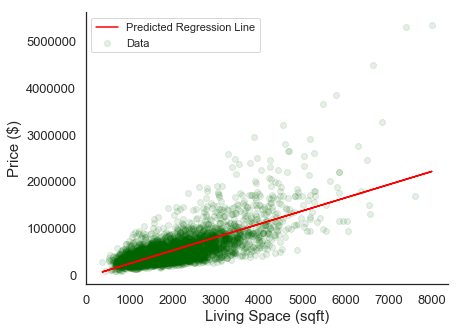

In [13]:
# Plot the Regression output and Regression Line
sns.set(style="white", font_scale=1)

plt.figure(figsize=(6.5,5))
plt.scatter(X_test,y_test,color='darkgreen',label="Data", alpha=.1)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("Living Space (sqft)", fontsize=15)
plt.ylabel("Price ($)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

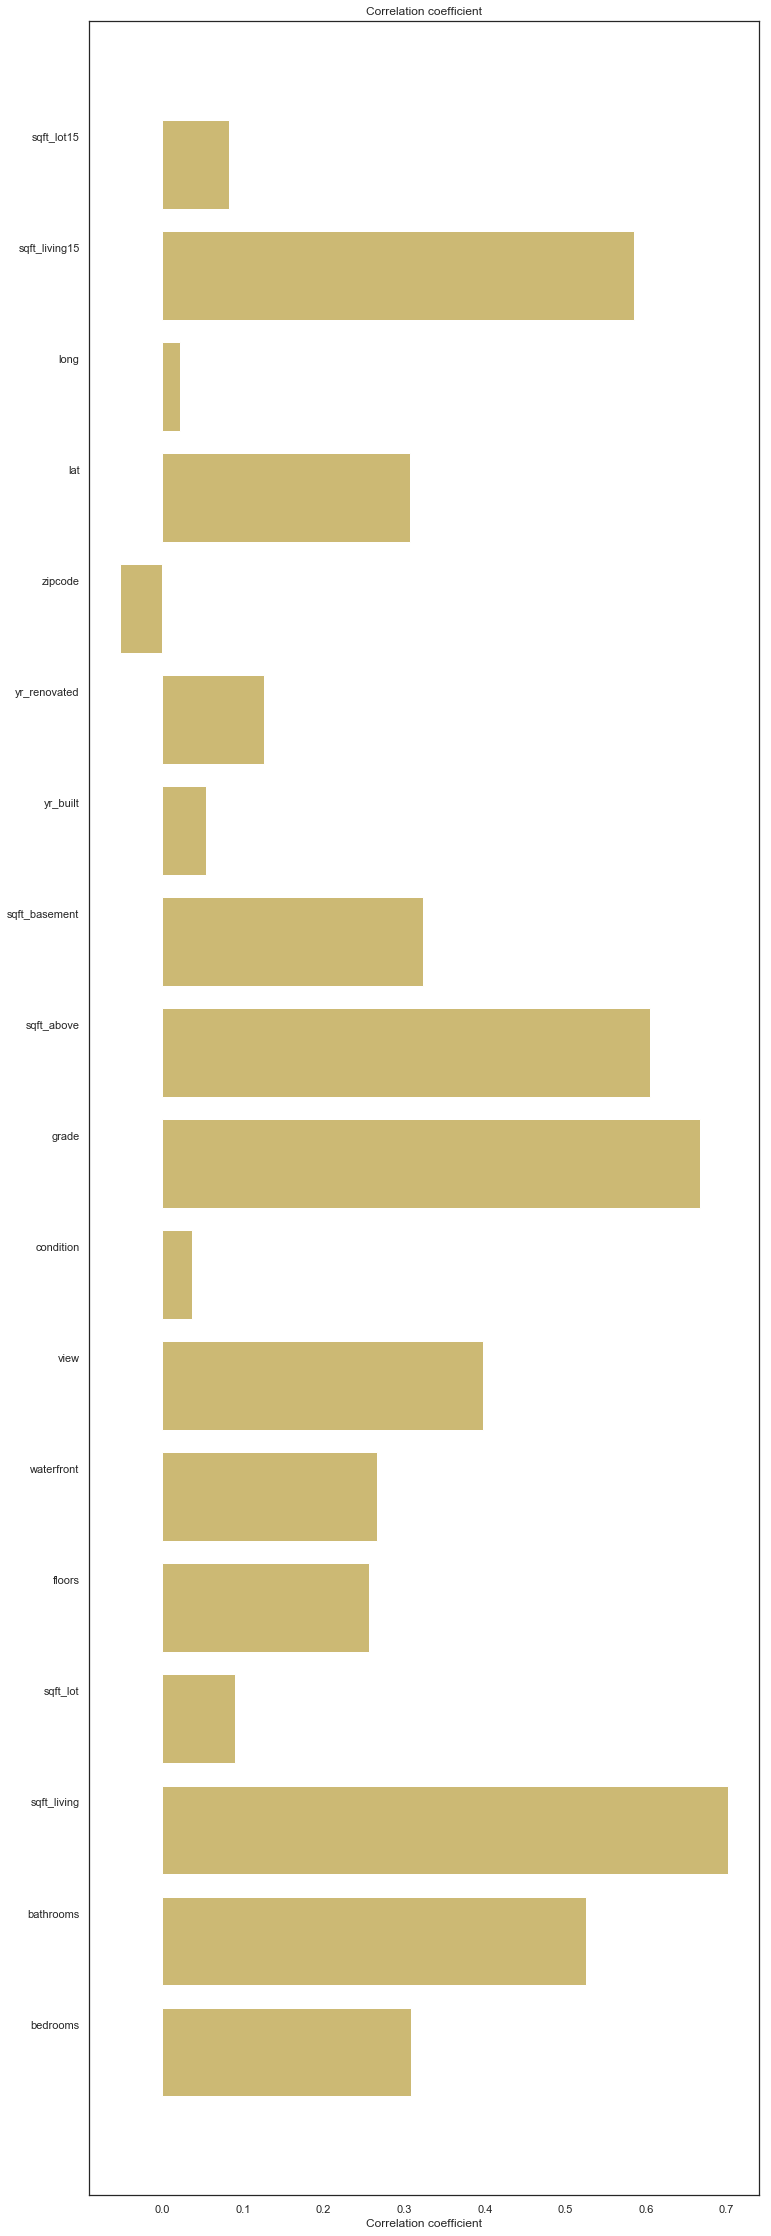

In [14]:
# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in df.columns if col not in ['id','date','price']]

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df.price.values)[0,1])
    
ind = np.arange(len(labels))
width = 0.5
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient")
#autolabel(rects)
plt.show()

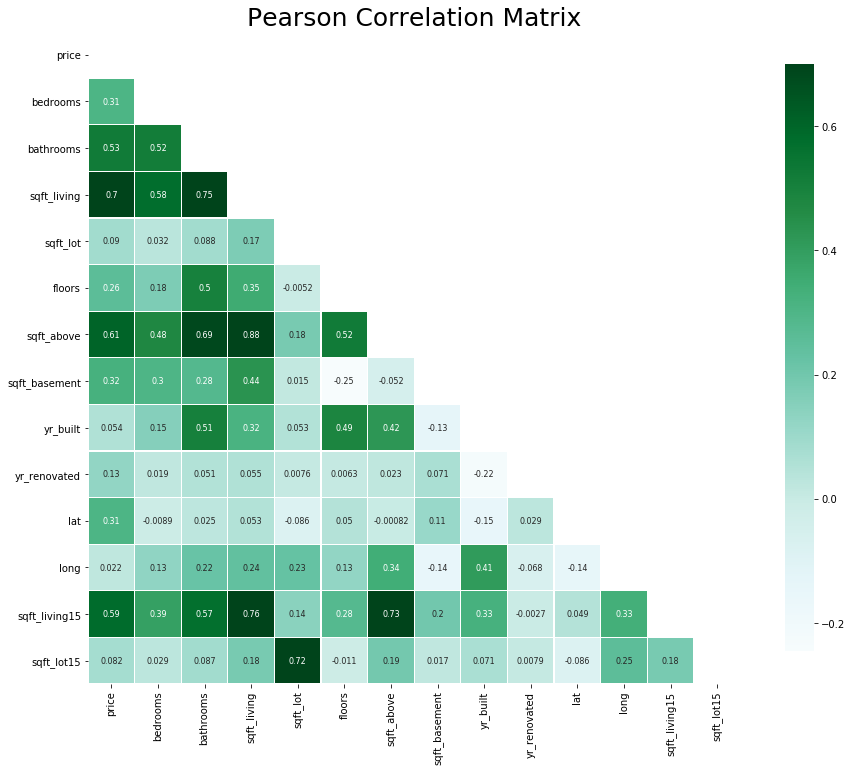

In [5]:
# Plot the Pearson Correlation Matrix for each of the variables

x_cols = [col for col in df.columns if col not in ['id','date']]
mask = np.zeros_like(df[x_cols].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[x_cols].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

In [18]:
x_cols = [col for col in df.columns if col not in ['id','date']]
x_cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [17]:
mask = np.zeros_like(df[x_cols].corr(), dtype=np.bool) 


14

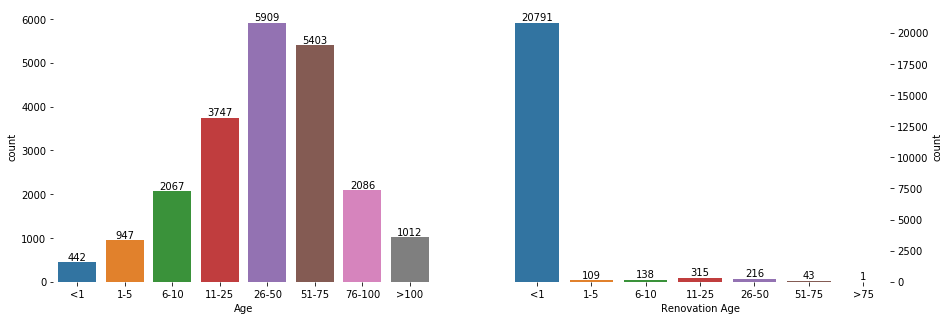

In [14]:
# Binning the year built and year of renovation
df_dm  = df.copy()

# just take the year from the date column
df_dm['sales_yr']=df_dm['date'].astype(str).str[:4]

# add the age of the buildings when the houses were sold as a new column
df_dm['age']=df_dm['sales_yr'].astype(int)-df_dm['yr_built']
# add the age of the renovation when the houses were sold as a new column
df_dm['age_rnv']=0
df_dm['age_rnv']=df_dm['sales_yr'][df_dm['yr_renovated']!=0].astype(int)-df_dm['yr_renovated'][df_dm['yr_renovated']!=0]
df_dm['age_rnv'][df_dm['age_rnv'].isnull()]=0

# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df_dm['age_binned'] = pd.cut(df_dm['age'], bins=bins, labels=labels)
# partition the age_rnv into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
df_dm['age_rnv_binned'] = pd.cut(df_dm['age_rnv'], bins=bins, labels=labels)

# histograms for the binned columns
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(df_dm['age_binned'],ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")   
p2=sns.countplot(df_dm['age_rnv_binned'],ax=axes[1])
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 200,height,ha="center")
    
axes[0].set(xlabel='Age')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Renovation Age');

In [15]:
# Encoding categorical data or binned variables
from sklearn.preprocessing import OneHotEncoder

df_ds = df_dm.copy()
df_dm = pd.get_dummies(df_dm, columns=['age_binned','age_rnv_binned'])


In [16]:
df_dm.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sales_yr', 'age',
       'age_rnv', 'age_binned_<1', 'age_binned_1-5', 'age_binned_6-10',
       'age_binned_11-25', 'age_binned_26-50', 'age_binned_51-75',
       'age_binned_76-100', 'age_binned_>100', 'age_rnv_binned_<1',
       'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
       'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75'],
      dtype='object')

In [16]:
# Remove unwanted columns before running the Backware Elimination
df_ds = df_dm.drop(['id', 'date', 'price'], axis=1)
df_ds1 = df_ds.copy()

In [62]:
# Perform Scaling of the values to run the Backward Elimination
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df_ds = np.append(arr = np.ones((df_ds.shape[0], 1)).astype(int), values = df_ds, axis = 1)
df_opt = sc.fit_transform(df_ds)

In [104]:
import statsmodels.formula.api as sm
def backwardElimination(x, y, SL):
    numVars = len(x[0])
    temp = np.zeros((50,6)).astype(int)
    temp = np.zeros((x.shape[0],numVars)).astype(int)
    for i in range(0, numVars):
        print(i)
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        print(adjR_before,"$$$$$$$$$$$$$$$$$$$$$$")
        print(maxVar,"@@@@@@@@@@@@@@@@@@@@@@@@@@@")
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    print(adjR_before,"$$$$$$$$$$$$$$$$$$$$$$",adjR_after)
                    if (adjR_before > adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        print("ROLLBACK!!!")
                        return x_rollback
                    else:
                        continue
        print(regressor_OLS.summary())
    return x

In [105]:
SL = 0.05
df_modelled = backwardElimination(df_opt, df_dm.price.values, SL)

0
0.2224146321216829 $$$$$$$$$$$$$$$$$$$$$$
0.928380618259111 @@@@@@@@@@@@@@@@@@@@@@@@@@@
0.2224146321216829 $$$$$$$$$$$$$$$$$$$$$$ 0.222414632121683
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     194.2
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        11:32:05   Log-Likelihood:            -3.1732e+05
No. Observations:               21613   AIC:                         6.347e+05
Df Residuals:                   21581   BIC:                         6.350e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     200.5
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        11:32:05   Log-Likelihood:            -3.1732e+05
No. Observations:               21613   AIC:                         6.347e+05
Df Residuals:                   21582   BIC:                         6.349e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.223e-13   4.06e-14     -5.474      0.0

0.2224866206922559 $$$$$$$$$$$$$$$$$$$$$$
0.8455901989166885 @@@@@@@@@@@@@@@@@@@@@@@@@@@
0.2224866206922559 $$$$$$$$$$$$$$$$$$$$$$ 0.22252127710791414
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     207.2
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        11:32:06   Log-Likelihood:            -3.1732e+05
No. Observations:               21613   AIC:                         6.347e+05
Df Residuals:                   21583   BIC:                         6.349e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|     

0.2225448296178294 $$$$$$$$$$$$$$$$$$$$$$ 0.22257398801791184
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     222.0
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        11:32:06   Log-Likelihood:            -3.1732e+05
No. Observations:               21613   AIC:                         6.347e+05
Df Residuals:                   21585   BIC:                         6.349e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

0.22263897901425134 $$$$$$$$$$$$$$$$$$$$$$
0.49876719808552383 @@@@@@@@@@@@@@@@@@@@@@@@@@@
0.22263897901425134 $$$$$$$$$$$$$$$$$$$$$$ 0.2226585102950891
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     248.6
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        11:32:07   Log-Likelihood:            -3.1732e+05
No. Observations:               21613   AIC:                         6.347e+05
Df Residuals:                   21588   BIC:                         6.349e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     282.4
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        11:32:07   Log-Likelihood:            -3.1732e+05
No. Observations:               21613   AIC:                         6.347e+05
Df Residuals:                   21591   BIC:                         6.349e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        n

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     282.4
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        11:32:07   Log-Likelihood:            -3.1732e+05
No. Observations:               21613   AIC:                         6.347e+05
Df Residuals:                   21591   BIC:                         6.349e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0          0        nan        n

0.22267540536563168 $$$$$$$$$$$$$$$$$$$$$$
nan @@@@@@@@@@@@@@@@@@@@@@@@@@@
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     282.4
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        11:32:07   Log-Likelihood:            -3.1732e+05
No. Observations:               21613   AIC:                         6.347e+05
Df Residuals:                   21591   BIC:                         6.349e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

0.22267540536563168 $$$$$$$$$$$$$$$$$$$$$$
nan @@@@@@@@@@@@@@@@@@@@@@@@@@@
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     282.4
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        11:32:08   Log-Likelihood:            -3.1732e+05
No. Observations:               21613   AIC:                         6.347e+05
Df Residuals:                   21591   BIC:                         6.349e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

0.22267540536563168 $$$$$$$$$$$$$$$$$$$$$$
nan @@@@@@@@@@@@@@@@@@@@@@@@@@@
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     282.4
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        11:32:08   Log-Likelihood:            -3.1732e+05
No. Observations:               21613   AIC:                         6.347e+05
Df Residuals:                   21591   BIC:                         6.349e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

0.22267540536563168 $$$$$$$$$$$$$$$$$$$$$$
nan @@@@@@@@@@@@@@@@@@@@@@@@@@@
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     282.4
Date:                Tue, 21 May 2019   Prob (F-statistic):               0.00
Time:                        11:32:09   Log-Likelihood:            -3.1732e+05
No. Observations:               21613   AIC:                         6.347e+05
Df Residuals:                   21591   BIC:                         6.349e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [17]:
from sklearn.feature_selection import RFE
# Construct our Linear Regression model
Y = df_dm.price.values
X = df_ds.as_matrix()

lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=10, verbose =3 )
rfe.fit(X,Y)

Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=10, step=1, verbose=3)

In [37]:
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False  True  True False  True False False False
 False False  True  True False False False False False False  True  True
  True False  True  True  True False  True  True False False  True False]
[14  1 16 22  8  1  1  5  1 17 18 11 19 15  1  1 20 21  6 10 13  2  1  1
  1  3  1  1  1 12  1  1  4  9  1  7]


In [18]:
columns_rfe = []
for iter,i in enumerate(rfe.ranking_):
    #print(i)
    if i == 1:
        columns_rfe.append((df_ds1.columns[iter]))

In [39]:
columns_rfe

['bathrooms',
 'waterfront',
 'view',
 'grade',
 'lat',
 'long',
 'age_binned_1-5',
 'age_binned_6-10',
 'age_binned_11-25',
 'age_binned_51-75',
 'age_binned_76-100',
 'age_binned_>100',
 'age_rnv_binned_1-5',
 'age_rnv_binned_6-10',
 'age_rnv_binned_51-75']

In [19]:
# Multiple Regression - 1

train_data_dm,test_data_dm = train_test_split(df_dm,train_size = 0.8,random_state=3)

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data_dm[features])
msecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data_dm[features],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv_5 = float(format(cross_val_score(complex_model_1,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))
cv_10 = float(format(cross_val_score(complex_model_1,df_dm[features],df_dm['price'],cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-1','selected features',msecm,rtrcm,artrcm,rtecm,artecm,cv_5,cv_10]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -57221293.13485957
Coefficients: [-5.68950279e+04  1.13310062e+04  3.18389287e+02 -2.90807628e-01
 -5.79609821e+03  5.84022824e+02]


,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation,10-Fold Cross Validation
1,Multiple Regression-1,selected features,248514.011,0.514,0.514,0.519,0.518,0.512,0.511
0,Simple Linear Regression,-,254289.149,0.492,-,0.496,-,0.491,0.489


In [20]:
# Multiple Regression - 2

train_data_dm,test_data_dm = train_test_split(df_dm,train_size = 0.8,random_state=3)

#features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
complex_model_1 = linear_model.LinearRegression()
complex_model_1.fit(train_data_dm[columns_rfe],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))

pred = complex_model_1.predict(test_data_dm[columns_rfe])
msecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(train_data_dm[columns_rfe],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(train_data_dm[columns_rfe],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_1.score(test_data_dm[columns_rfe],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_1.score(test_data_dm[columns_rfe],test_data['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv_5 = float(format(cross_val_score(complex_model_1,df_dm[columns_rfe],df_dm['price'],cv=5).mean(),'.3f'))
cv_10 = float(format(cross_val_score(complex_model_1,df_dm[columns_rfe],df_dm['price'],cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-2','selected features - RFE Run',msecm,rtrcm,artrcm,rtecm,artecm,cv_5,cv_10]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: -19707342.614955056
Coefficients: [117099.5432726  591465.02492478  69294.72550904 168082.86750244
 526051.8696962   52386.17533492 154295.15934779 250103.86349984
 292129.7031566  -76048.57903536]


,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation,10-Fold Cross Validation
2,Multiple Regression-2,selected features - RFE Run,212944.895,0.637,0.637,0.647,0.646,0.637,0.637
1,Multiple Regression-1,selected features,248514.011,0.514,0.514,0.519,0.518,0.512,0.511
0,Simple Linear Regression,-,254289.149,0.492,-,0.496,-,0.491,0.489


In [57]:
evaluation = evaluation.drop([2,3,4],axis = 0)

In [21]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','age_binned_<1', 'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 
             'age_binned_26-50', 'age_binned_51-75','age_binned_76-100', 'age_binned_>100',
             'zipcode']
complex_model_2 = linear_model.LinearRegression()
complex_model_2.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_2.intercept_))
print('Coefficients: {}'.format(complex_model_2.coef_))

pred = complex_model_2.predict(test_data_dm[features])
msecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_2.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_2.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_2.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_2.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv_5 = float(format(cross_val_score(complex_model_2,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))
cv_10 = float(format(cross_val_score(complex_model_2,df_dm[features],df_dm['price'],cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-3','selected features',msecm,rtrcm,artrcm,rtecm,artecm,cv_5,cv_10]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 14932064.4567091
Coefficients: [-3.74523328e+04  4.83495326e+04  1.71684976e+02 -2.31081061e-01
  1.03590806e+04  5.56285921e+05  4.78399848e+04  1.24143045e+05
 -8.88123227e+04 -1.05756567e+05 -1.04723750e+05 -1.35898725e+05
 -5.37336956e+04  8.41048129e+04  1.84153081e+05  2.20667166e+05
 -1.60046391e+02]


,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation,10-Fold Cross Validation
3,Multiple Regression-3,selected features,209712.753,0.652,0.652,0.657,0.656,0.648,0.648
2,Multiple Regression-2,selected features - RFE Run,212944.895,0.637,0.637,0.647,0.646,0.637,0.637
1,Multiple Regression-1,selected features,248514.011,0.514,0.514,0.519,0.518,0.512,0.511
0,Simple Linear Regression,-,254289.149,0.492,-,0.496,-,0.491,0.489


In [22]:
# Mulitple Regression with all features without preprocessing

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_3 = linear_model.LinearRegression()
complex_model_3.fit(train_data[features],train_data['price'])

print('Intercept: {}'.format(complex_model_3.intercept_))
print('Coefficients: {}'.format(complex_model_3.coef_))

pred = complex_model_3.predict(test_data[features])
msecm = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_3.score(train_data[features],train_data['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_3.score(train_data[features],train_data['price']),train_data.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_3.score(test_data[features],test_data['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_3.score(test_data[features],test_data['price']),test_data.shape[0],len(features)),'.3f'))
cv_5 = float(format(cross_val_score(complex_model_3,df[features],df['price'],cv=5).mean(),'.3f'))
cv_10 = float(format(cross_val_score(complex_model_3,df[features],df['price'],cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-4','all features, no preprocessing',msecm,rtrcm,artrcm,rtecm,artecm,cv_5,cv_10]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 7580919.940367501
Coefficients: [-3.51323305e+04  4.25821114e+04  1.10705020e+02  1.13581822e-01
  6.82992716e+03  5.61794985e+05  5.28174040e+04  2.48918356e+04
  9.57708783e+04  7.01998423e+01  4.05051774e+01 -2.70948034e+03
  2.26715091e+01 -5.80427853e+02  5.98629230e+05 -2.08875497e+05
  2.32857416e+01 -3.75353459e-01]


,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation,10-Fold Cross Validation
4,Multiple Regression-4,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695,0.695
3,Multiple Regression-3,selected features,209712.753,0.652,0.652,0.657,0.656,0.648,0.648
2,Multiple Regression-2,selected features - RFE Run,212944.895,0.637,0.637,0.647,0.646,0.637,0.637
1,Multiple Regression-1,selected features,248514.011,0.514,0.514,0.519,0.518,0.512,0.511
0,Simple Linear Regression,-,254289.149,0.492,-,0.496,-,0.491,0.489


In [23]:
# Multiple Regression with all columns after pre processing

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_4 = linear_model.LinearRegression()
complex_model_4.fit(train_data_dm[features],train_data_dm['price'])

print('Intercept: {}'.format(complex_model_4.intercept_))
print('Coefficients: {}'.format(complex_model_4.coef_))

pred = complex_model_4.predict(test_data_dm[features])
msecm = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred)),'.3f'))
rtrcm = float(format(complex_model_4.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_4.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm = float(format(complex_model_4.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm = float(format(adjustedR2(complex_model_4.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv_5 = float(format(cross_val_score(complex_model_4,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))
cv_10 = float(format(cross_val_score(complex_model_4,df_dm[features],df_dm['price'],cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Regression-5','all features',msecm,rtrcm,artrcm,rtecm,artecm,cv_5,cv_10]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 8748434.764253397
Coefficients: [-3.33491904e+04  3.76549641e+04  1.10716218e+02  1.22826592e-01
 -1.26725956e+04  5.69817402e+05  5.41386091e+04  3.17275550e+04
  9.52300581e+04  7.05366495e+01  4.01794910e+01 -4.46861874e+04
 -5.43838963e+04 -7.11287025e+04 -8.93583274e+04 -5.92594439e+04
  3.70943651e+04  1.22837694e+05  1.58884499e+05 -1.97812401e+04
  9.43034022e+04  8.74164248e+04  4.14131931e+04 -1.50309593e+04
 -1.06990366e+05 -8.13304552e+04 -6.50061210e+02  6.03335811e+05
 -2.10031732e+05  2.42386074e+01 -3.08651553e-01]


,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation,10-Fold Cross Validation
5,Multiple Regression-5,all features,191879.550,0.701,0.7,0.713,0.711,0.698,0.698
4,Multiple Regression-4,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695,0.695
3,Multiple Regression-3,selected features,209712.753,0.652,0.652,0.657,0.656,0.648,0.648
2,Multiple Regression-2,selected features - RFE Run,212944.895,0.637,0.637,0.647,0.646,0.637,0.637
1,Multiple Regression-1,selected features,248514.011,0.514,0.514,0.519,0.518,0.512,0.511
0,Simple Linear Regression,-,254289.149,0.492,-,0.496,-,0.491,0.489


In [24]:
# Ridge Regression with different values of alpha

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_R = linear_model.Ridge(alpha=1)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])

pred1 = complex_model_R.predict(test_data_dm[features])
msecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))
cv11 = float(format(cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=10).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=100)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])

pred2 = complex_model_R.predict(test_data_dm[features])
msecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))
cv22 = float(format(cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=10).mean(),'.3f'))

complex_model_R = linear_model.Ridge(alpha=1000)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])

pred3 = complex_model_R.predict(test_data_dm[features])
msecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_R.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_R.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_R.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_R.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))
cv33 = float(format(cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Ridge Regression','alpha=1, all features',msecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1,cv11]
evaluation.loc[r+1] = ['Ridge Regression','alpha=100, all features',msecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2,cv22]
evaluation.loc[r+2] = ['Ridge Regression','alpha=1000, all features',msecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3,cv33]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)



,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation,10-Fold Cross Validation
5,Multiple Regression-5,all features,191879.550,0.701,0.7,0.713,0.711,0.698,0.698
6,Ridge Regression,"alpha=1, all features",191903.548,0.701,0.7,0.713,0.711,0.698,0.698
4,Multiple Regression-4,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695,0.695
7,Ridge Regression,"alpha=100, all features",195372.495,0.694,0.693,0.703,0.701,0.691,0.692
3,Multiple Regression-3,selected features,209712.753,0.652,0.652,0.657,0.656,0.648,0.648
8,Ridge Regression,"alpha=1000, all features",209625.468,0.651,0.65,0.658,0.655,0.648,0.650
2,Multiple Regression-2,selected features - RFE Run,212944.895,0.637,0.637,0.647,0.646,0.637,0.637
1,Multiple Regression-1,selected features,248514.011,0.514,0.514,0.519,0.518,0.512,0.511
0,Simple Linear Regression,-,254289.149,0.492,-,0.496,-,0.491,0.489


In [25]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
complex_model_L = linear_model.Lasso(alpha=1)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred1 = complex_model_L.predict(test_data_dm[features])
msecm1 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred1)),'.3f'))
rtrcm1 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm1 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm1 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm1 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv1 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))
cv11 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=10).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=100)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred2 = complex_model_L.predict(test_data_dm[features])
msecm2 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred2)),'.3f'))
rtrcm2 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm2 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm2 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm2 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv2 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))
cv22 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=10).mean(),'.3f'))

complex_model_L = linear_model.Lasso(alpha=1000)
complex_model_L.fit(train_data_dm[features],train_data_dm['price'])

pred3 = complex_model_L.predict(test_data_dm[features])
msecm3 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred3)),'.3f'))
rtrcm3 = float(format(complex_model_L.score(train_data_dm[features],train_data_dm['price']),'.3f'))
artrcm3 = float(format(adjustedR2(complex_model_L.score(train_data_dm[features],train_data_dm['price']),train_data_dm.shape[0],len(features)),'.3f'))
rtecm3 = float(format(complex_model_L.score(test_data_dm[features],test_data_dm['price']),'.3f'))
artecm3 = float(format(adjustedR2(complex_model_L.score(test_data_dm[features],test_data_dm['price']),test_data_dm.shape[0],len(features)),'.3f'))
cv3 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=5).mean(),'.3f'))
cv33 = float(format(cross_val_score(complex_model_L,df_dm[features],df_dm['price'],cv=10).mean(),'.3f'))

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso Regression','alpha=1, all features',msecm1,rtrcm1,artrcm1,rtecm1,artecm1,cv1,cv11]
evaluation.loc[r+1] = ['Lasso Regression','alpha=100, all features',msecm2,rtrcm2,artrcm2,rtecm2,artecm2,cv2,cv22]
evaluation.loc[r+2] = ['Lasso Regression','alpha=1000, all features',msecm3,rtrcm3,artrcm3,rtecm3,artecm3,cv3,cv33]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Mean Squared Error (MSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation,10-Fold Cross Validation
5,Multiple Regression-5,all features,191879.550,0.701,0.7,0.713,0.711,0.698,0.698
6,Ridge Regression,"alpha=1, all features",191903.548,0.701,0.7,0.713,0.711,0.698,0.698
9,Lasso Regression,"alpha=1, all features",191880.918,0.701,0.7,0.713,0.711,0.698,0.698
10,Lasso Regression,"alpha=100, all features",192060.144,0.701,0.7,0.713,0.711,0.698,0.698
4,Multiple Regression-4,"all features, no preprocessing",193693.989,0.698,0.697,0.708,0.707,0.695,0.695
11,Lasso Regression,"alpha=1000, all features",193587.943,0.697,0.697,0.708,0.706,0.695,0.695
7,Ridge Regression,"alpha=100, all features",195372.495,0.694,0.693,0.703,0.701,0.691,0.692
3,Multiple Regression-3,selected features,209712.753,0.652,0.652,0.657,0.656,0.648,0.648
8,Ridge Regression,"alpha=1000, all features",209625.468,0.651,0.65,0.658,0.655,0.648,0.650
2,Multiple Regression-2,selected features - RFE Run,212944.895,0.637,0.637,0.647,0.646,0.637,0.637


In [27]:
#Polynomial Regression - With all the combinations described above for Mulitple Regression
# We have chosen the degree as 2.

evaluation_poly = pd.DataFrame({'Model': [],
                                'Details':[],
                                'Mean Squared Error (MSE)':[],
                                'R-squared (training)':[],
                                'Adjusted R-squared (training)':[],
                                'R-squared (test)':[],
                                'Adjusted R-squared (test)':[],
                                '5-Fold Cross Validation':[],
                                '10-Fold Cross Validation':[]})

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','yr_built','zipcode']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred1 = poly.predict(X_testpoly)
msepoly1 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred1)),'.3f'))
rtrpoly1 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly1 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv1 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))
cv11 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=10).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred2 = poly.predict(X_testpoly)
msepoly2 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred2)),'.3f'))
rtrpoly2 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly2 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv2 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))
cv22 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=10).mean(),'.3f'))

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
            'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred3 = poly.predict(X_testpoly)
msepoly3 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred3)),'.3f'))
rtrpoly3 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly3 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv3 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))
cv33 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=10).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred4 = poly.predict(X_testpoly)
msepoly4 = float(format(np.sqrt(metrics.mean_squared_error(test_data['price'],pred4)),'.3f'))
rtrpoly4 = float(format(poly.score(X_trainpoly,train_data['price']),'.3f'))
rtepoly4 = float(format(poly.score(X_testpoly,test_data['price']),'.3f'))
cv4 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=5).mean(),'.3f'))
cv44 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df['price'],cv=10).mean(),'.3f'))

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',
            'view','condition','grade','sqft_above','sqft_basement','age_binned_<1', 
            'age_binned_1-5', 'age_binned_6-10','age_binned_11-25', 'age_binned_26-50',
            'age_binned_51-75','age_binned_76-100', 'age_binned_>100','age_rnv_binned_<1',
            'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
            'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75',
            'zipcode','lat','long','sqft_living15','sqft_lot15']
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df_dm[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred5 = poly.predict(X_testpoly)
msepoly5 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred5)),'.3f'))
rtrpoly5 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly5 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv5 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df_dm['price'],cv=5).mean(),'.3f'))
cv55 = float(format(cross_val_score(linear_model.LinearRegression(),X_allpoly,df_dm['price'],cv=10).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df_dm[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Ridge(alpha=1).fit(X_trainpoly, train_data['price'])

pred6 = poly.predict(X_testpoly)
msepoly6 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred6)),'.3f'))
rtrpoly6 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly6 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv6 = float(format(cross_val_score(linear_model.Ridge(alpha=1),X_allpoly,df_dm['price'],cv=5).mean(),'.3f'))
cv66 = float(format(cross_val_score(linear_model.Ridge(alpha=1),X_allpoly,df_dm['price'],cv=10).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df_dm[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Ridge(alpha=50000).fit(X_trainpoly, train_data['price'])

pred7 = poly.predict(X_testpoly)
msepoly7 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred7)),'.3f'))
rtrpoly7 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly7 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv7 = float(format(cross_val_score(linear_model.Ridge(alpha=50000),X_allpoly,df_dm['price'],cv=5).mean(),'.3f'))
cv77 = float(format(cross_val_score(linear_model.Ridge(alpha=50000),X_allpoly,df_dm['price'],cv=10).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df_dm[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Lasso(alpha=1).fit(X_trainpoly, train_data['price'])

pred8 = poly.predict(X_testpoly)
msepoly8 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred8)),'.3f'))
rtrpoly8 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly8 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv8 = float(format(cross_val_score(linear_model.Lasso(alpha=1),X_allpoly,df_dm['price'],cv=5).mean(),'.3f'))
cv88 = float(format(cross_val_score(linear_model.Lasso(alpha=1),X_allpoly,df_dm['price'],cv=10).mean(),'.3f'))

polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df_dm[features])
X_trainpoly = polyfeat.fit_transform(train_data_dm[features])
X_testpoly = polyfeat.fit_transform(test_data_dm[features])
poly = linear_model.Lasso(alpha=50000).fit(X_trainpoly, train_data['price'])

pred9 = poly.predict(X_testpoly)
msepoly9 = float(format(np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred9)),'.3f'))
rtrpoly9 = float(format(poly.score(X_trainpoly,train_data_dm['price']),'.3f'))
rtepoly9 = float(format(poly.score(X_testpoly,test_data_dm['price']),'.3f'))
cv9 = float(format(cross_val_score(linear_model.Lasso(alpha=50000),X_allpoly,df_dm['price'],cv=5).mean(),'.3f'))
cv99 = float(format(cross_val_score(linear_model.Lasso(alpha=50000),X_allpoly,df_dm['price'],cv=10).mean(),'.3f'))

r = evaluation_poly.shape[0]
evaluation_poly.loc[r] = ['Polynomial Regression','degree=2, selected features, no preprocessing',msepoly1,rtrpoly1,'-',rtepoly1,'-',cv1,cv11]
evaluation_poly.loc[r+1] = ['Polynomial Regression','degree=3, selected features, no preprocessing',msepoly2,rtrpoly2,'-',rtepoly2,'-',cv2,cv22]
evaluation_poly.loc[r+2] = ['Polynomial Regression','degree=2, all features, no preprocessing',msepoly3,rtrpoly3,'-',rtepoly3,'-',cv3,cv33]
evaluation_poly.loc[r+3] = ['Polynomial Regression','degree=3, all features, no preprocessing',msepoly4,rtrpoly4,'-',rtepoly4,'-',cv4,cv44]
evaluation_poly.loc[r+4] = ['Polynomial Regression','degree=2, all features',msepoly5,rtrpoly5,'-',rtepoly5,'-',cv5,cv55]
evaluation_poly.loc[r+5] = ['Polynomial Ridge Regression','alpha=1, degree=2, all features',msepoly6,rtrpoly6,'-',rtepoly6,'-',cv6,cv66]
evaluation_poly.loc[r+6] = ['Polynomial Ridge Regression','alpha=50000, degree=2, all features',msepoly7,rtrpoly7,'-',rtepoly7,'-',cv7,cv77]
evaluation_poly.loc[r+7] = ['Polynomial Lasso Regression','alpha=1, degree=2, all features',msepoly8,rtrpoly8,'-',rtepoly8,'-',cv8,cv88]
evaluation_poly.loc[r+8] = ['Polynomial Lasso Regression','alpha=50000, degree=2, all features',msepoly9,rtrpoly9,'-',rtepoly9,'-',cv9,cv99]
evaluation_poly_temp = evaluation_poly[['Model','Details','Mean Squared Error (MSE)','R-squared (training)','R-squared (test)','5-Fold Cross Validation','10-Fold Cross Validation']]
evaluation_poly_temp.sort_values(by = '5-Fold Cross Validation', ascending=False)

,Model,Details,Mean Squared Error (MSE),R-squared (training),R-squared (test),5-Fold Cross Validation,10-Fold Cross Validation
2,Polynomial Regression,"degree=2, all features, no preprocessing",151160.962,0.830,0.822,0.813,0.814
6,Polynomial Ridge Regression,"alpha=50000, degree=2, all features",159872.572,0.810,0.801,0.791,0.791
8,Polynomial Lasso Regression,"alpha=50000, degree=2, all features",166020.484,0.797,0.785,0.779,0.778
7,Polynomial Lasso Regression,"alpha=1, degree=2, all features",166195.984,0.807,0.785,0.778,0.779
0,Polynomial Regression,"degree=2, selected features, no preprocessing",191016.553,0.730,0.716,0.714,0.713
1,Polynomial Regression,"degree=3, selected features, no preprocessing",188734.527,0.749,0.722,0.517,0.449
3,Polynomial Regression,"degree=3, all features, no preprocessing",211383.899,0.869,0.652,0.498,0.073
5,Polynomial Ridge Regression,"alpha=1, degree=2, all features",150177.290,0.838,0.824,-3201.887,-2996.907
4,Polynomial Regression,"degree=2, all features",151652.262,0.840,0.821,-10821.982,-8744.380
